# Avacado Project

**The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.**

# Importing the dataset

In [35]:
import pandas as pd

In [36]:
df=pd.read_csv('Avacado.csv')

# Impoting the required libraries

In [76]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from heatmap import heatmap,corrplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

# Getting the basic outlook over the data

In [37]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [38]:
df.shape

(16468, 14)

In [39]:
df=df.dropna()

In [40]:
df.shape

(1517, 14)

In [41]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [42]:
pd.set_option('display.max_rows',None)

In [43]:
df.describe(include='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,NaN,12-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,26.995386,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,14.848287,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,0.000000,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,14.000000,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,29.000000,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,39.000000,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


In [44]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [46]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 160.0+ KB


In [48]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [51]:
df['Date'].value_counts()

12-04-2015    34
05-04-2015    34
19-04-2015    33
26-04-2015    32
29-03-2015    32
10-05-2015    32
22-03-2015    32
03-05-2015    31
15-03-2015    31
08-03-2015    30
01-03-2015    30
17-05-2015    29
07-06-2015    29
22-02-2015    29
31-05-2015    28
24-05-2015    28
15-02-2015    28
14-06-2015    27
08-02-2015    27
21-06-2015    25
01-02-2015    24
28-06-2015    23
05-07-2015    23
25-01-2015    22
06-12-2015    22
29-11-2015    22
08-11-2015    22
15-11-2015    22
09-08-2015    22
22-11-2015    22
13-12-2015    22
01-11-2015    22
20-12-2015    22
27-12-2015    21
02-08-2015    21
12-07-2015    21
16-08-2015    21
18-01-2015    21
11-10-2015    20
25-10-2015    20
30-08-2015    20
23-08-2015    20
26-07-2015    20
06-09-2015    20
18-10-2015    20
04-10-2015    20
19-07-2015    20
11-01-2015    19
27-09-2015    19
20-09-2015    19
13-09-2015    19
04-01-2015    18
07-02-2016     6
27-03-2016     6
25-12-2016     6
20-03-2016     6
24-04-2016     6
17-04-2016     6
31-01-2016    

In [52]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [53]:
df['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [54]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,14.0,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


In [56]:
df["Date"]= pd.to_datetime(df["Date"])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1517 non-null   float64       
 1   Date          1517 non-null   datetime64[ns]
 2   AveragePrice  1517 non-null   float64       
 3   Total Volume  1517 non-null   float64       
 4   4046          1517 non-null   float64       
 5   4225          1517 non-null   float64       
 6   4770          1517 non-null   float64       
 7   Total Bags    1517 non-null   float64       
 8   Small Bags    1517 non-null   float64       
 9   Large Bags    1517 non-null   float64       
 10  XLarge Bags   1517 non-null   float64       
 11  type          1517 non-null   object        
 12  year          1517 non-null   float64       
 13  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 165.9+ KB


In [58]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [59]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11


In [60]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'month'],
      dtype='object')

Observations:
    
    1.There are some columns which we can remove right now'Unnamed: 0, 'Date','type'(we can remove type since all are conventional only)

In [63]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [64]:
df1=df.drop(['Unnamed: 0','Date','type'],axis=1)

In [65]:
df1.shape

(1517, 12)

In [66]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,11


In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['region']=le.fit_transform(df1['region'])

In [68]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,11


In [69]:
df1['region'].value_counts()

6     76
0     67
2     65
3     65
4     62
1     54
31    52
5     51
44    49
9     47
26    44
19    41
12    40
42    39
38    38
49    36
22    34
47    34
7     31
34    30
28    29
17    29
50    27
25    25
48    25
11    24
41    24
8     23
13    23
32    22
29    21
36    21
15    19
46    19
24    18
14    18
10    17
37    17
23    17
18    16
35    16
45    16
39    15
30    13
16    13
27    12
33    12
20    10
43     9
40     9
21     3
Name: region, dtype: int64

In [70]:
#creating the dictionary to know which label represents what
le.fit(df['region'])
encoded_data=le.transform(df['region'])
label_value_dict=dict(zip(range(len(le.classes_)),le.classes_)) 

In [71]:
label_value_dict[0]

'Albany'

In [72]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,11


Observations:
    
    1.Now we got a precise dataset, the scaling has to be done in the later stage of the project based upon the range of the independent variables.

# EDA

# Univariate Analysis

In [73]:
def eda(col):
    print(col)
    print(df1[col].describe())
    print('\n')
    plt.plot()
    sns.distplot(df1[col])
    plt.show()
    print('\n')
    plt.plot()
    df1[col].hist(grid=True)
    plt.show()
    print('\n')
    plt.plot()
    sns.boxplot(df1[col])
    plt.show()

**Column 1: Total Volume**

Total Volume
count    1.517000e+03
mean     1.601879e+06
std      4.433143e+06
min      3.875074e+04
25%      1.474700e+05
50%      4.027919e+05
75%      9.819751e+05
max      4.465546e+07
Name: Total Volume, dtype: float64




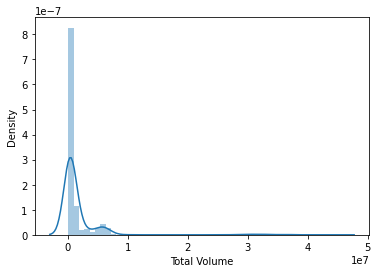

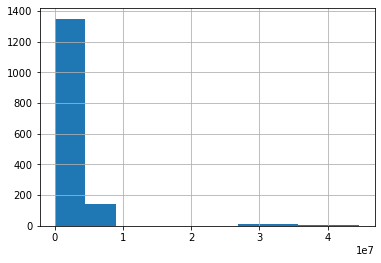

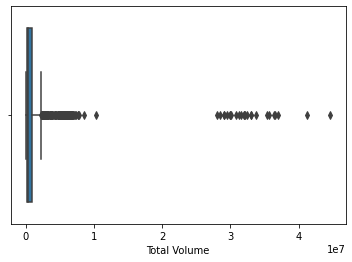

In [77]:
eda('Total Volume')

In [79]:
df1['Total Volume'].head(10)

0     64236.62
1     54876.98
2    118220.22
3     78992.15
4     51039.60
5     55979.78
6     83453.76
7    109428.33
8     99811.42
9     74338.76
Name: Total Volume, dtype: float64

Observations:
    
    1.The above column ranges from 3.875074e+04 to 4.465546e+07,its a huge range. scaling has to be done in later stage.
    2.There is skewness.
    3.There are outliers.   

4046
count    1.517000e+03
mean     6.464387e+05
std      1.947614e+06
min      4.677200e+02
25%      2.040034e+04
50%      8.175117e+04
75%      3.775785e+05
max      1.893304e+07
Name: 4046, dtype: float64




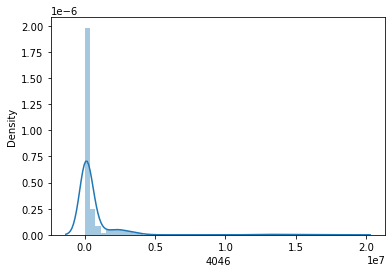

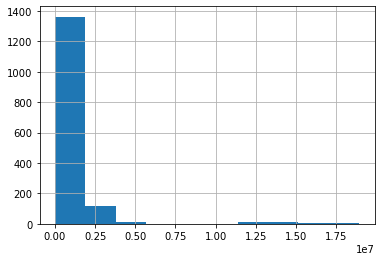

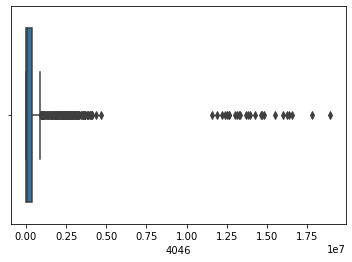

In [81]:
eda('4046')

Observations:
    
    1.We can see that the column ranges from 10^2 to 10^7 indicating that there is requirement of scaling doen the column.
    2.There is skewness.
    3.There are outliers.

**Column 3: 4225**

4225
count    1.517000e+03
mean     6.114375e+05
std      1.672906e+06
min      1.783770e+03
25%      4.147606e+04
50%      1.186649e+05
75%      4.851503e+05
max      1.895648e+07
Name: 4225, dtype: float64




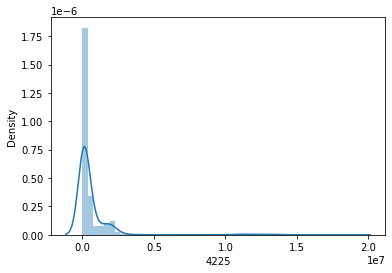

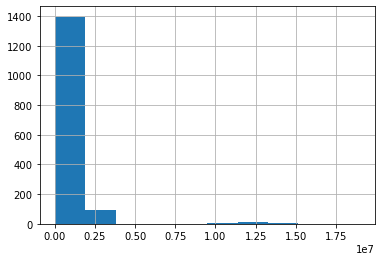

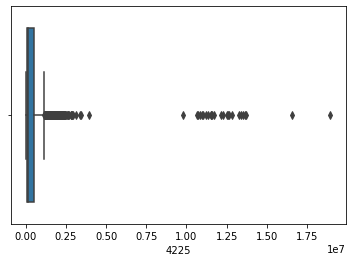

In [82]:
eda('4225')

Observations:
    
    1.The range is huge in this case also .
    2.Most of the values lies between 1783 to 0.2 million.
    3.There is skewness in the data.
    4.There are outliers in the data.

**Column 4 : 4770**

4770
count    1.517000e+03
mean     5.040550e+04
std      1.377812e+05
min      0.000000e+00
25%      9.112500e+02
50%      7.688170e+03
75%      2.916730e+04
max      1.381516e+06
Name: 4770, dtype: float64




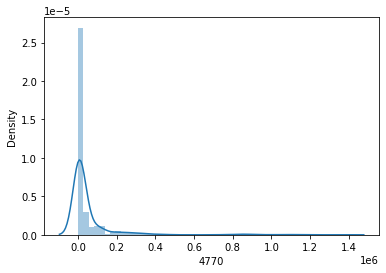

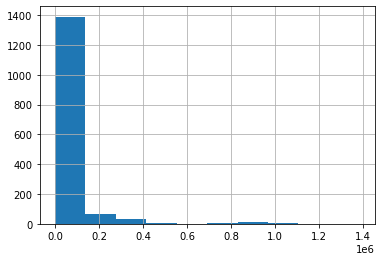

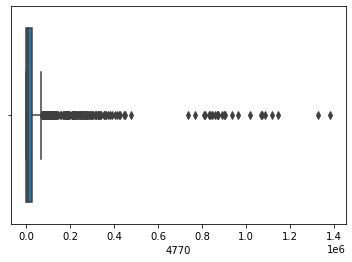

In [83]:
eda('4770')

Observations:
    
    1.Most of the values lies between 0 to one lakh twenty thousands.
    2.There are outliers
    3.There is skewness.

**Column 5: Total Bags**

Total Bags
count    1.517000e+03
mean     2.935974e+05
std      7.579765e+05
min      3.311770e+03
25%      3.620689e+04
50%      7.397906e+04
75%      1.576097e+05
max      6.736304e+06
Name: Total Bags, dtype: float64




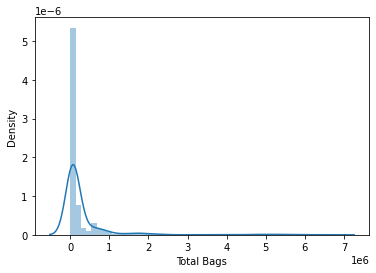

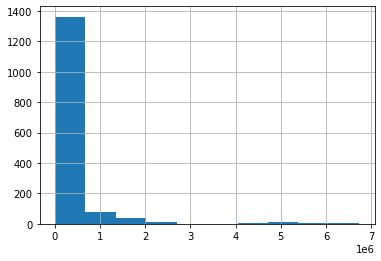

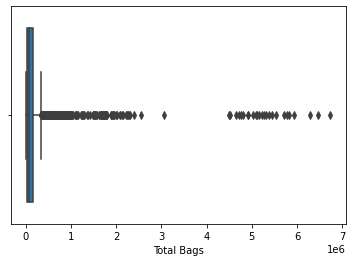

In [84]:
eda('Total Bags')

Observations:
    
    1.Most of the values are in range 0 to 6 lakhs.
    2.There are outliers.
    3.There is skewness.

**Column 6: Small Bags**

Small Bags
count    1.517000e+03
mean     2.487736e+05
std      6.474765e+05
min      3.311770e+03
25%      2.972722e+04
50%      6.237569e+04
75%      1.461994e+05
max      5.893642e+06
Name: Small Bags, dtype: float64




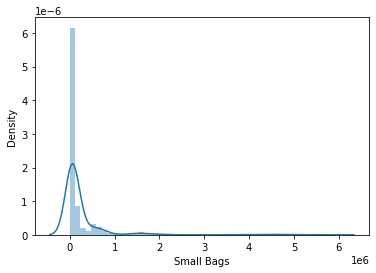

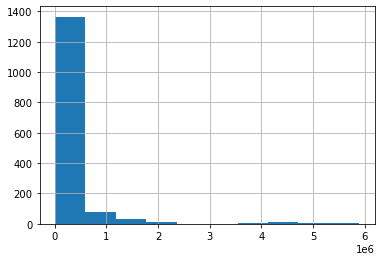

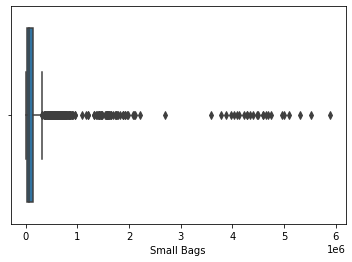

In [85]:
eda('Small Bags')

Observations:
    
    1.Most of the values falls in the range of 0 to 6 lakhs
    2.There are outliers.
    3.There is skewness.

**Column 7: Large Bags**

Large Bags
count    1.517000e+03
mean     4.264205e+04
std      1.182157e+05
min      0.000000e+00
25%      5.407400e+02
50%      5.044350e+03
75%      2.926767e+04
max      1.121076e+06
Name: Large Bags, dtype: float64




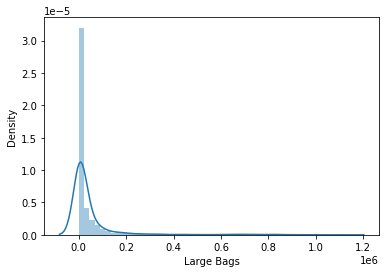

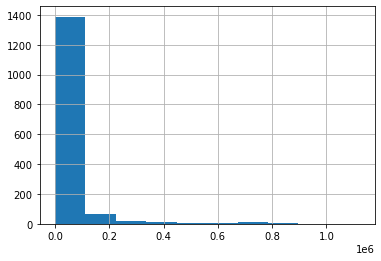

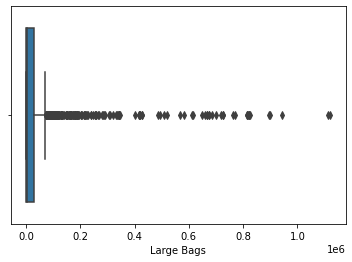

In [86]:
eda('Large Bags')

Obervations:
    
    1.Most of the values lies between 0 to two lakh.
    2.There is skewness in the data.
    3.There are outliers.

**Column 8: Xlarge Bags**

XLarge Bags
count      1517.000000
mean       2181.771074
std        7455.712144
min           0.000000
25%           0.000000
50%           0.000000
75%         401.480000
max      108072.790000
Name: XLarge Bags, dtype: float64




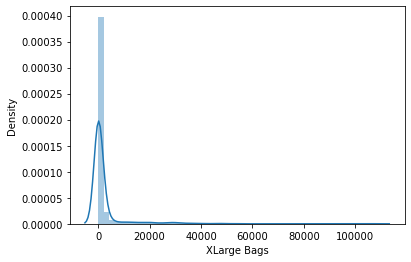

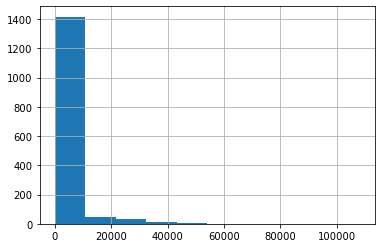

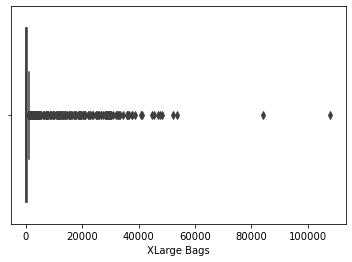

In [87]:
eda('XLarge Bags')

Observations:
    
    1.The value lies from 0 to 100000.
    2.There is skewness.
    3.There are outliers.

**Column 9: year**

year
count    1517.000000
mean     2015.162821
std         0.369324
min      2015.000000
25%      2015.000000
50%      2015.000000
75%      2015.000000
max      2016.000000
Name: year, dtype: float64




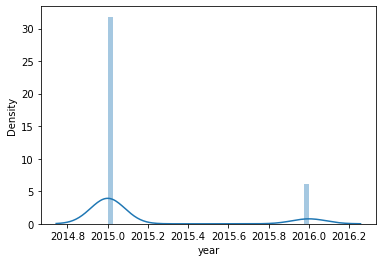

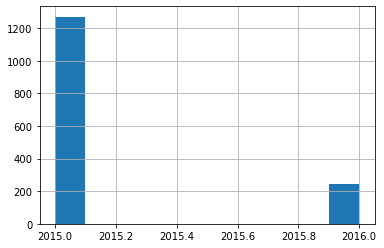

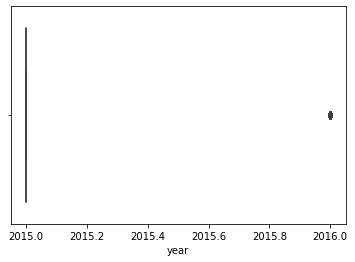

In [88]:
eda('year')

Observations:
    
    1.Most of the observations are made from 2015 compared to 2016.

**Column 10: region**

region
count    1517.000000
mean       21.196440
std        16.132398
min         0.000000
25%         6.000000
50%        19.000000
75%        35.000000
max        50.000000
Name: region, dtype: float64




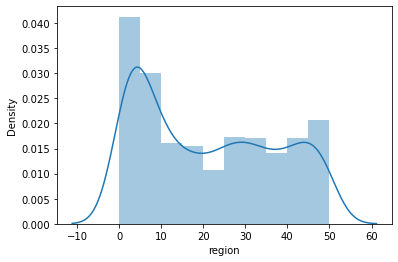

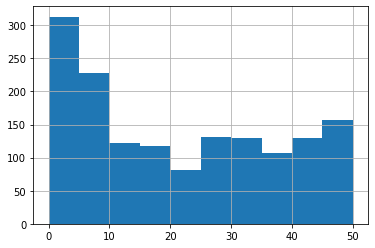

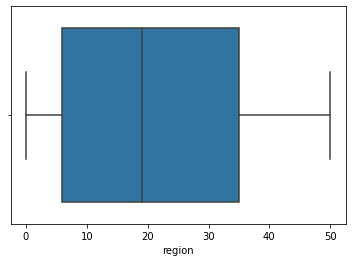

In [89]:
eda('region')

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39'),
 Text(40, 0, '40'),
 Text(41, 0, '41'),
 Text(42, 0, '42'),
 Text(43, 0, '43'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '46'),
 Text(47, 0, '47'),
 Text(48, 0, '48'),
 Text(49, 0, '49'),
 Text(50, 0, '50')]

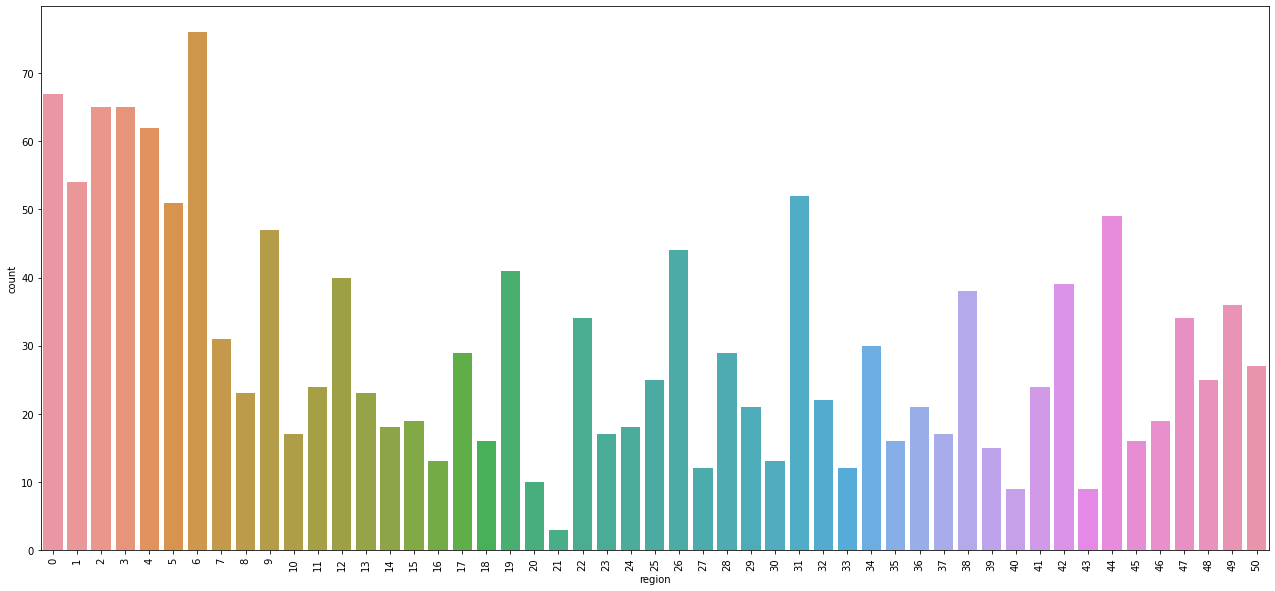

In [93]:
plt.figure(figsize=(22,10))
count1=sns.countplot(df1['region'])
count1.set_xticklabels(count1.get_xticklabels(), rotation=90)

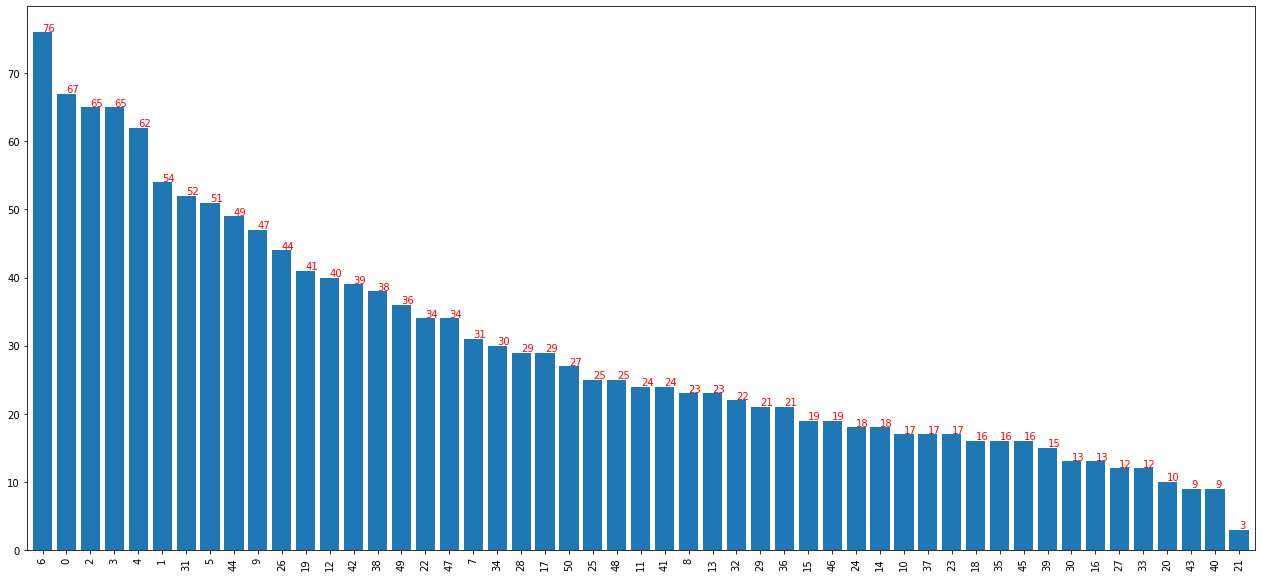

In [95]:
plt.figure(figsize=(22,10))
s = df1['region'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.region + 0.2 , v.region, color='red')
plt.show()

Observations:
    
    1.We can see that label 6,0,2,3,4,1 takes the maximum number of values compared to others.

In [96]:
#lets check which are those regions
m=[6,0,2,3,4,1]
for i in m:
    print(label_value_dict[i])
    print('\n')

California


Albany


BaltimoreWashington


Boise


Boston


Atlanta




**Column 11: month**

month
count    1517.000000
mean        6.362558
std         3.472146
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: month, dtype: float64




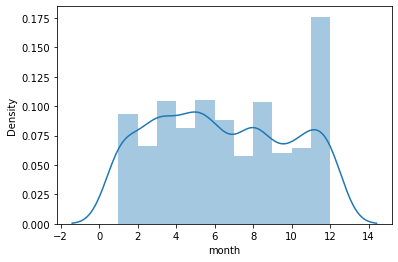

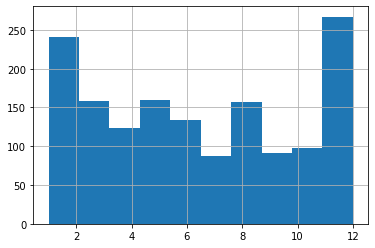

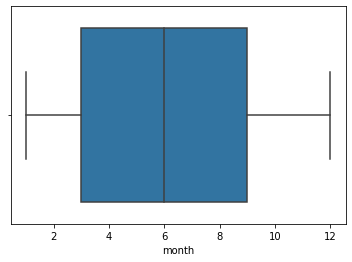

In [97]:
eda('month')

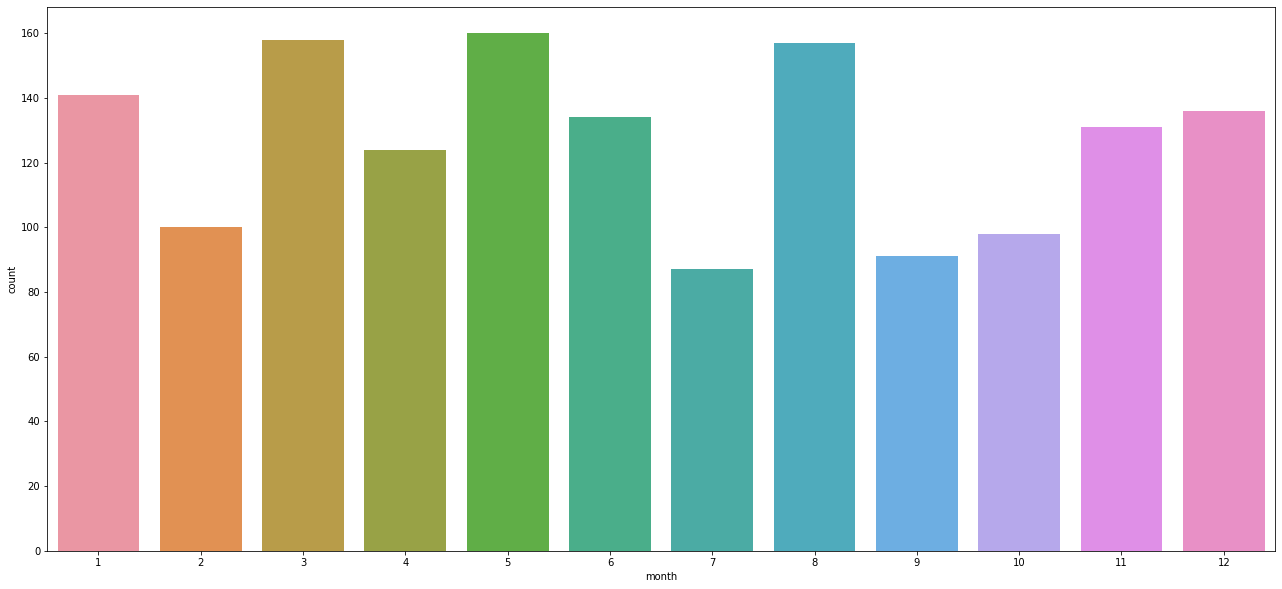

In [99]:
plt.figure(figsize=(22,10))
sns.countplot(df1['month'])
plt.show()

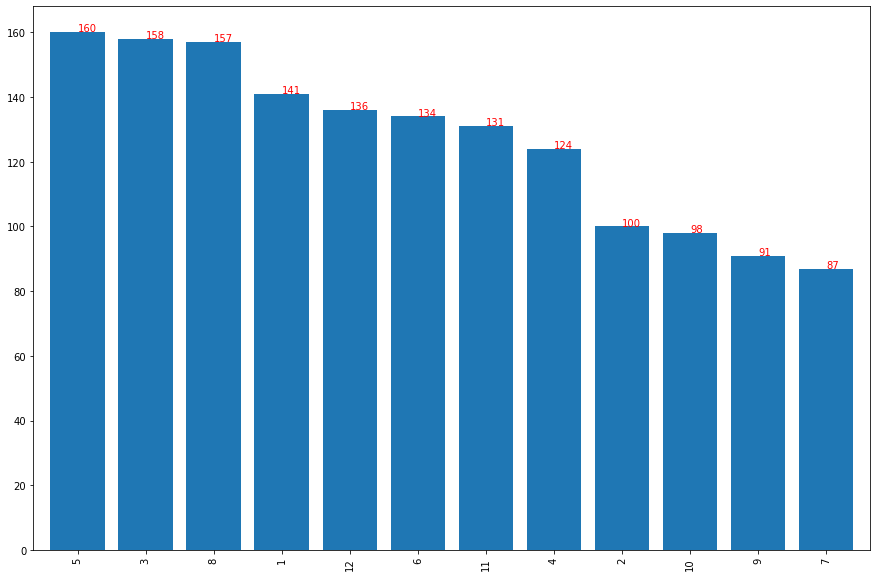

In [100]:
plt.figure(figsize=(15,10))
s = df1['month'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.month + 0.2 , v.month, color='red')
plt.show()

Observations:
    
    1.We can see that most of the observations are done in May, April and Augaust month

# Multivariate Analysis

In [102]:
from heatmap import corrplot,heatmap

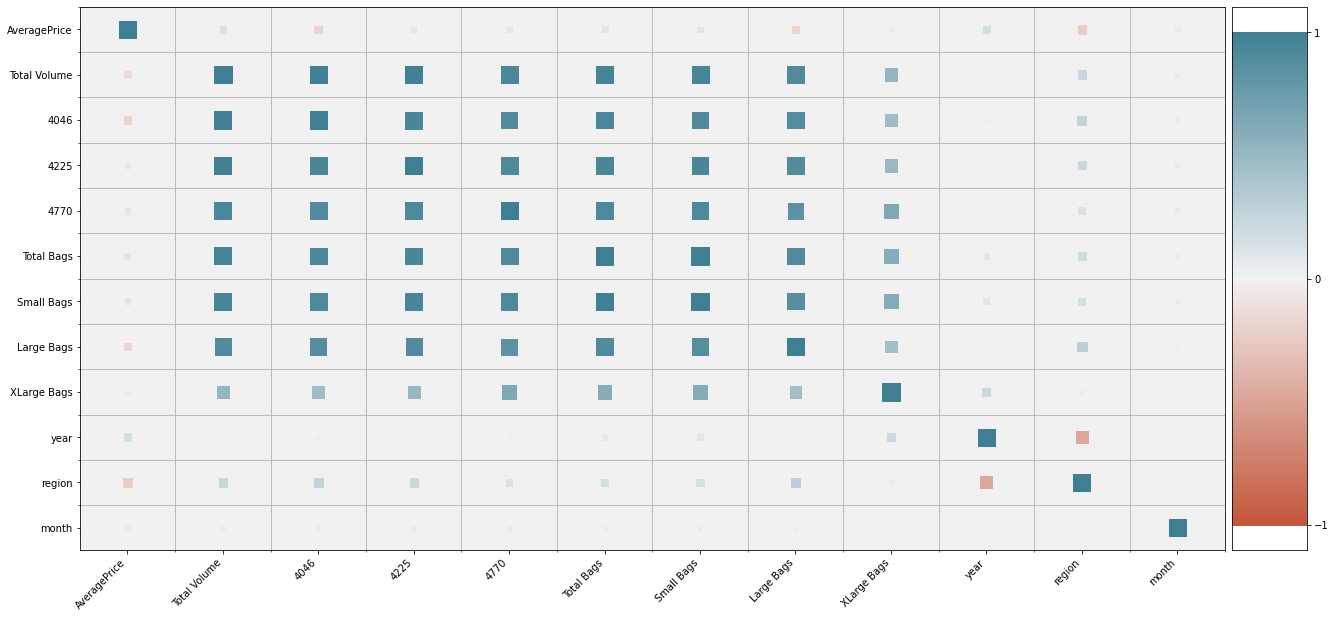

In [104]:
plt.figure(figsize=(22,10))
corrplot(df1.corr(),size_scale=300)

Observations:
    
    1.The graph is giving a hint that there is a possibality of multicollinearity

In [108]:
#Checking for the multicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
 # Calculating VIF
 vif = dict()
 vif["FeatureColumns"] = Data.columns
 vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
 return(pd.DataFrame(vif))

In [109]:
CalculateVIF(df1)

,FeatureColumns,VIF
0,AveragePrice,40.203494
1,Total Volume,inf
2,4046,inf
3,4225,inf
4,4770,inf
5,Total Bags,inf
6,Small Bags,inf
7,Large Bags,inf
8,XLarge Bags,inf
9,year,46.262733


**We know that the basic assumptions of linear regression is that there has to be no multicollinearity but here there is infinite value, so it has to be removed by removing the relatively likely column**

In [114]:
df_new=df1.drop(['4046','4225','4770','Total Bags','Small Bags','Large Bags'],axis=1)

In [115]:
CalculateVIF(df_new)

,FeatureColumns,VIF
0,AveragePrice,35.695880
1,Total Volume,1.732748
2,XLarge Bags,1.563592
3,year,43.374788
4,region,3.147463
5,month,4.407038


In [111]:
df_new.shape

(1517, 5)

In [112]:
#Lets check the accuracy of df_new dataset in model building phase of the project.

In [106]:
corr_matrix=df1.corr()
corr_matrix['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
month           0.060642
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
region         -0.229408
Name: AveragePrice, dtype: float64

Observations:
    
    1.From the graph as well as from the corr_matrix we can see that year is highly correlated, next is month and then region, 4046 so on.
    lets list down those variables which are highly correlated to response variable and lets analyse those separately in bi variate analysis.Even though year is significantly correlated we cant consider that because there is a huge class imbalance between the years, that there are only 247 values in 2016 comapred to 1270 values in 2015.
    1.month
    2.region
    3.4046
    4.Large Bags
    

In [113]:
df1['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

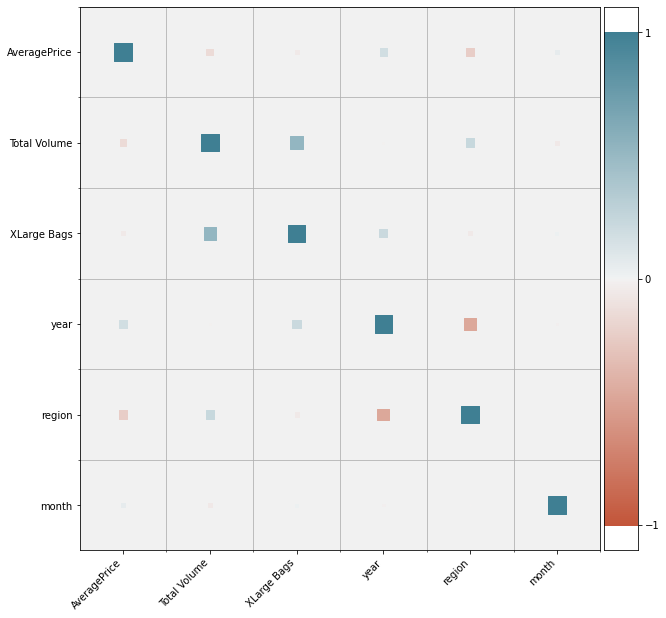

In [117]:
plt.figure(figsize=(10,10))
corrplot(df_new.corr(),size_scale=300)

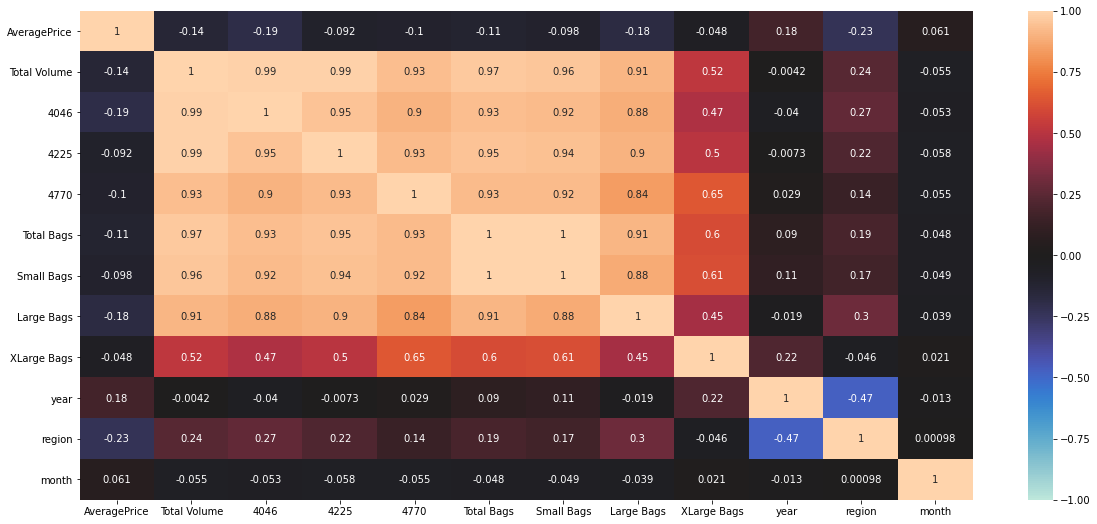

In [118]:
plt.figure(figsize=(20,9))
sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    There are independent variabels which are significantly correlated to each other.
    1.XLarge vs Total Volume
    2.region vs Total Volume
    3.year vs XLarge
    4.Year vs region

**Multivariate Analysis by grouping**

In [119]:
#lets group the datatset by region and month and lets check the average price

In [169]:
reg=df1.groupby('region')

In [170]:
reg_avg_price=reg['AveragePrice'].mean()

In [171]:
reg_avg_price=reg_avg_price.sort_values(ascending=False)

In [172]:
reg_avg_price=reg_avg_price.to_frame()

In [173]:
reg_avg_price.head()

,AveragePrice
region,
46,1.347368
7,1.311613
5,1.301569
30,1.293846
45,1.260000


In [174]:
reg_avg_price['region'] = reg_avg_price.index

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39'),
 Text(40, 0, '40'),
 Text(41, 0, '41'),
 Text(42, 0, '42'),
 Text(43, 0, '43'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '46'),
 Text(47, 0, '47'),
 Text(48, 0, '48'),
 Text(49, 0, '49'),
 Text(50, 0, '50')]

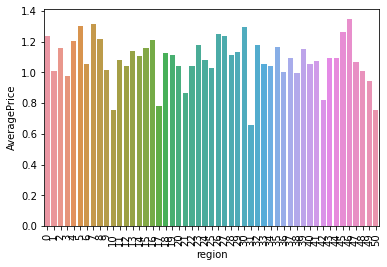

In [175]:
plt.plot(figsize=(20,9))
count3=sns.barplot(x='region',y='AveragePrice',data=reg_avg_price)
count3.set_xticklabels(count3.get_xticklabels(), rotation=90)

In [151]:
reg_avg_price.describe()

,AveragePrice,region
count,51.000000,51.000000
mean,1.080694,25.000000
std,0.148017,14.866069
min,0.659808,0.000000
25%,1.020477,12.500000
50%,1.091111,25.000000
75%,1.171360,37.500000
max,1.347368,50.000000


In [176]:
reg_avg_price.head(2)

,AveragePrice,region
region,,
46,1.347368,46
7,1.311613,7


In [177]:
reg_avg_price.tail(2)

,AveragePrice,region
region,,
10,0.755882,10
31,0.659808,31


In [178]:
label_value_dict[46]

'Syracuse'

In [179]:
label_value_dict[31]

'PhoenixTucson'

Observations:
    
    1.We can see that avrage price changes according to the region, the highest price is for region Syracuse,and lowest is for PhoenixTucson

In [156]:
#grouping according to month

In [162]:
mon=df1.groupby('month')

In [165]:
mon_avg_price=mon['AveragePrice'].mean()

In [166]:
mon_avg_price

month
1     1.034894
2     1.105400
3     1.066962
4     1.071532
5     1.070938
6     1.047388
7     1.085632
8     1.070955
9     1.074176
10    1.100408
11    1.122366
12    1.073088
Name: AveragePrice, dtype: float64

In [180]:
mon_avg_price=mon_avg_price.sort_values(ascending=False)

In [181]:
mon_avg_price=mon_avg_price.to_frame()

In [185]:
mon_avg_price['month'] = mon_avg_price.index

In [186]:
mon_avg_price

,AveragePrice,month
month,,
11,1.122366,11
2,1.105400,2
10,1.100408,10
7,1.085632,7
9,1.074176,9
12,1.073088,12
4,1.071532,4
8,1.070955,8
5,1.070938,5


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

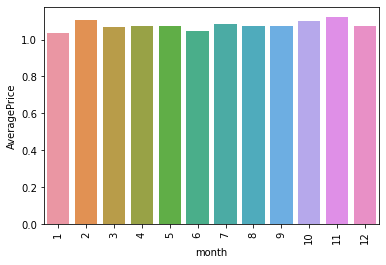

In [187]:
plt.plot(figsize=(20,9))
count3=sns.barplot(x='month',y='AveragePrice',data=mon_avg_price)
count3.set_xticklabels(count3.get_xticklabels(), rotation=90)

Observations:
    
    1.We can see that there is not much average price difference according to month, but we can see high averaged price in november.

# Bi variate analsysi

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

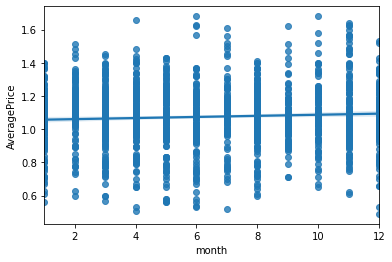

In [188]:
sns.regplot(x='month',y='AveragePrice',data=df1)

Observations:
    
    1.From the graph we can say that its constant.

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

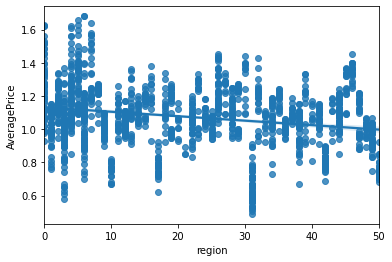

In [190]:
sns.regplot(x='region',y='AveragePrice',data=df1)

Observations:
    
    1.No significant observations.

<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

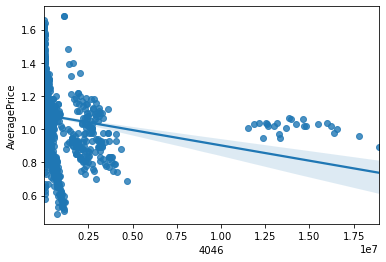

In [192]:
sns.regplot(x='4046',y='AveragePrice',data=df1)

Observations:
    
    1.The average price will be less or rather its stays constant as the number of avagado sells through code 4046.

<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

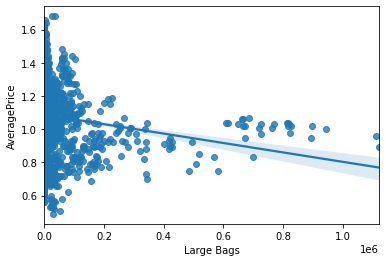

In [193]:
sns.regplot(x='Large Bags',y='AveragePrice',data=df1)

Observations:
    
    1.The average price will be less or rather its stays constant as the number of avagado sells through Large Bags

<AxesSubplot:xlabel='XLarge Bags', ylabel='Total Volume'>

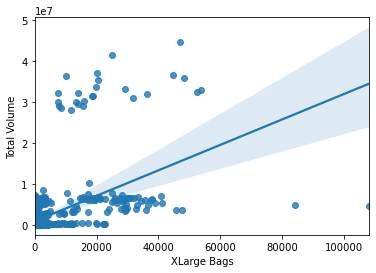

In [195]:
sns.regplot(x='XLarge Bags',y='Total Volume',data=df1)

Observations:
    
    1.It depicts the obviousness as xlarge bags increases the total volume also will increase.

<AxesSubplot:xlabel='region', ylabel='Total Volume'>

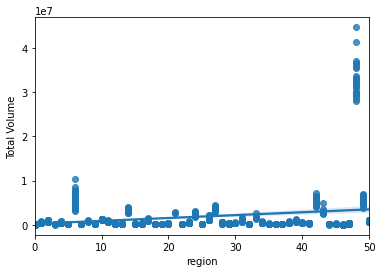

In [196]:
sns.regplot(x='region',y='Total Volume',data=df1)

Observations:
    
    1.No significant observations.

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

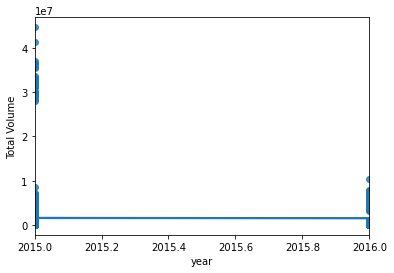

In [197]:
sns.regplot(x='year',y='Total Volume',data=df1)

Observations:
    
    1.It shows a constant graph.

# Data Cleaning

In [198]:
df1.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
month           0
dtype: int64

In [199]:
k=df1.applymap(np.isreal)

In [200]:
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

AveragePrice
True    1517
Name: AveragePrice, dtype: int64


Total Volume
True    1517
Name: Total Volume, dtype: int64


4046
True    1517
Name: 4046, dtype: int64


4225
True    1517
Name: 4225, dtype: int64


4770
True    1517
Name: 4770, dtype: int64


Total Bags
True    1517
Name: Total Bags, dtype: int64


Small Bags
True    1517
Name: Small Bags, dtype: int64


Large Bags
True    1517
Name: Large Bags, dtype: int64


XLarge Bags
True    1517
Name: XLarge Bags, dtype: int64


year
True    1517
Name: year, dtype: int64


region
True    1517
Name: region, dtype: int64


month
True    1517
Name: month, dtype: int64




Observations:
    
    There are no null values.

# Removing the outliers

# Removing of outliers by zscore method

In [201]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
df2=df1[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df1.shape[0]-df2.shape[0])/df1.shape[0])

percentage of loss of data by zscore is : 0.053394858272907054


Observations:
    
    1.The data loss is less than the 7% hence its ok.

In [204]:
#lets carry out for df_new(dataset without or least multicollinearity)
df_new1=pd.DataFrame()
z1=np.abs(zscore(df_new))
threshold=3
df_new1=df_new[(z1<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df_new.shape[0]-df_new1.shape[0])/df_new.shape[0])

percentage of loss of data by zscore is : 0.043506921555702044


Observations:
    
    1.The data loss is less than the 7% hence its ok.

In [205]:
df2.shape

(1436, 12)

In [206]:
df_new1.shape

(1451, 6)

# Splitting the target variable

In [207]:
df2.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region', 'month'],
      dtype='object')

In [208]:
x=df2.drop('AveragePrice',axis=1)
y=df2['AveragePrice']

In [209]:
#lets split the dataset df_new1 which is with least multicollinearity

In [210]:
x1=df_new1.drop('AveragePrice',axis=1)
y1=df_new1['AveragePrice']

In [211]:
x.shape

(1436, 11)

In [212]:
y.shape

(1436,)

In [213]:
x1.shape

(1451, 5)

In [214]:
y1.shape

(1451,)

# Removal of skewness

In [215]:
x.skew()

Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
month           0.111898
dtype: float64

Comment:
    
    Except catagorical columns which is been label encoded all other columns which are falls away from the range of 0.5 to -0.5 has to be trated for skewness.
    
    observations:The following columns has to be treated for skewness.
                1.Total Volume
                2.4046
                3.4225
                4.4770
                5.Total Bags
                6.Small Bags
                7.Large Bags
                8.XLarge Bags

In [223]:
#lets find the best method for skewness
from scipy import stats
from scipy.stats import skew
from scipy.stats import boxcox
def skee(a):
    model=[np.sqrt(a),np.log(a),stats.boxcox(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        x=m
        print(skew(m))
        print('\n')

In [225]:
skee(x['Total Volume'])

original skewness is: 2.7040845406685885


1.7823811121836302


0.4624084210101266


0.05379820118694935




In [226]:
x['Total Volume']=stats.boxcox(x['Total Volume'])[0]

In [227]:
skee(x['4046'])

original skewness is: 3.1207559580520443


1.8808750094469735


-0.2702596262280408


-0.025790604836603545




In [228]:
x['4046']=stats.boxcox(x['4046'])[0]

In [229]:
skee(x['4225'])

original skewness is: 2.3674291453826304


1.3786169676584108


0.01126220416008986


0.0008282446607447568




In [230]:
x['4225']=stats.boxcox(x['4225'])[0]

In [231]:
skee(x['Total Bags'])

original skewness is: 4.165747480832365


2.1645176403224955


0.3782127558498156


-0.0008679136600732199




In [233]:
x['Total Bags']=np.cbrt(x['Total Bags'])

In [234]:
skee(x['Small Bags'])

original skewness is: 4.410267265487678


2.177594161449349


0.42035416922348207


0.013714782563543144




In [236]:
x['Small Bags']=stats.boxcox(x['Small Bags'])[0]

In [241]:
x['Large Bags']=np.cbrt(x['Large Bags'])

In [246]:
x['XLarge Bags']=np.cbrt(x['XLarge Bags'])

In [247]:
x.skew()

Total Volume    0.053854
4046           -0.025818
4225           -0.211264
4770            3.331191
Total Bags      1.569990
Small Bags      0.013729
Large Bags      0.933361
XLarge Bags     1.867443
year            2.004439
region          0.276276
month           0.111898
dtype: float64

In [254]:
x['4770']=np.cbrt(x['4770'])

In [258]:
x['XLarge Bags']=np.cbrt(x['XLarge Bags'])

In [259]:
x.skew()

Total Volume    0.053854
4046           -0.025818
4225           -0.211264
4770            1.076970
Total Bags      1.569990
Small Bags      0.013729
Large Bags      0.933361
XLarge Bags     0.552869
year            2.004439
region          0.276276
month           0.111898
dtype: float64

In [265]:
sk=np.cbrt(x['Total Bags'])
sk.skew()

0.7777190518571085

In [262]:
x['4770']=np.sqrt(x['4770'])

In [266]:
x['Total Bags']=np.cbrt(x['Total Bags'])

In [267]:
x.skew()

Total Volume    0.053854
4046           -0.025818
4225           -0.211264
4770            0.301946
Total Bags      0.777719
Small Bags      0.013729
Large Bags      0.933361
XLarge Bags     0.552869
year            2.004439
region          0.276276
month           0.111898
dtype: float64

In [268]:
x1.skew()

Total Volume    2.605045
XLarge Bags     4.874510
year            1.998127
region          0.271411
month           0.104196
dtype: float64

In [269]:
skee(x1['Total Volume'])

original skewness is: 2.6050451041166154


1.7344474254903772


0.46649249111192764


0.0568600989905317




In [270]:
x1['Total Volume']=stats.boxcox(x1['Total Volume'])[0]

In [273]:
sk=np.cbrt(x1['XLarge Bags'])
sk.skew()

1.836873545662578

In [274]:
x1['XLarge Bags']=np.cbrt(x1['XLarge Bags'])

In [275]:
x1['XLarge Bags']=np.cbrt(x1['XLarge Bags'])

In [276]:
x1.skew()

Total Volume    0.056919
XLarge Bags     0.535171
year            1.998127
region          0.271411
month           0.104196
dtype: float64

# Standard Scaling

In [277]:
from sklearn.preprocessing import StandardScaler

In [278]:
scale=StandardScaler()

In [279]:
xs=scale.fit_transform(x)

In [280]:
x1_s=scale.fit_transform(x1)

In [281]:
xs.shape

(1436, 11)

In [282]:
x1_s.shape

(1451, 5)

# Building the model

In [289]:
#Finding the maximum accuracy
maxAccu=0
ln=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(xs,y,test_size=0.3,random_state=i)
    mod=ln
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.43176864718850205 on random state 8


In [290]:
x_train,x_test,y_train,y_test=train_test_split(xs,y,test_size=0.3,random_state=8)

In [291]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)

x train shape: (1005, 11)
x test shape (431, 11)


y train shape: (1005,)
y test shape (431,)


In [292]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.432
RMSE: 0.145
mean absolute error: 0.114


In [295]:
#lasso model
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.431
RMSE: 0.145
mean absolute error: 0.114


In [297]:
#Ridge model
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.432
RMSE: 0.145
mean absolute error: 0.114


In [300]:
#ElasticNet model
enr=ElasticNet(alpha=0.001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.427
RMSE: 0.146
mean absolute error: 0.114


In [301]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.838
RMSE: 0.078
mean absolute error: 0.057


In [302]:
svr = SVR()
svr.fit(x_train, y_train)
predsvr=svr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predsvr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predsvr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predsvr)),3))

r2 score is : 0.759
RMSE: 0.094
mean absolute error: 0.075


# Cross validation sccore

In [303]:
models=[ln,ls,rd,enr,rf,svr]
for m in models:
    
    score=cross_val_score(m,xs,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
-0.038


Lasso(alpha=0.0001) score is:
-0.038


Ridge(alpha=0.001) score is:
-0.046


ElasticNet(alpha=0.001) score is:
-0.012


RandomForestRegressor(n_estimators=1000) score is:
0.165


SVR() score is:
0.075




In [304]:
score=cross_val_score(rf,xs,y,cv=5)
print(round((score.mean()),3))

0.166


Observations:
    
    1.Based on the observations i will choose random forest regressor

# Hyper parameter tuning

In [306]:
rf1=RandomForestRegressor()
grid_param={
    'n_estimators':[10,25,50,75],
    'criterion':['mse','mae'],
    'max_features':['auto','sqrt'],
    'min_samples_split':[2, 5, 10, 15],
    'min_samples_leaf':[1, 2, 5, 10]
}

gd_sr=GridSearchCV(estimator=rf1,
                  param_grid=grid_param,
                  scoring='r2',
                  cv=5)

gd_sr.fit(xs,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'mae', 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}
0.27760300857517206


In [308]:
rf1=RandomForestRegressor(n_estimators=1000,criterion='mae',max_features='sqrt',min_samples_split=5,min_samples_leaf=10)

In [309]:
rf1.fit(x_train, y_train)
predrf1=rf1.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf1)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf1)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf1)),3))

r2 score is : 0.715
RMSE: 0.103
mean absolute error: 0.076


Observations:
    
    1.The maximum accuracy we got is 0.715

# Saving the model

In [310]:
import joblib
joblib.dump(rf1,'rf1avacado.obj')

['rf1avacado.obj']